/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:160: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


Diff 1934-638 -0.260242872006


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:319: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:440: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


Diff 521-365 0.309087985447
-0.924701914374


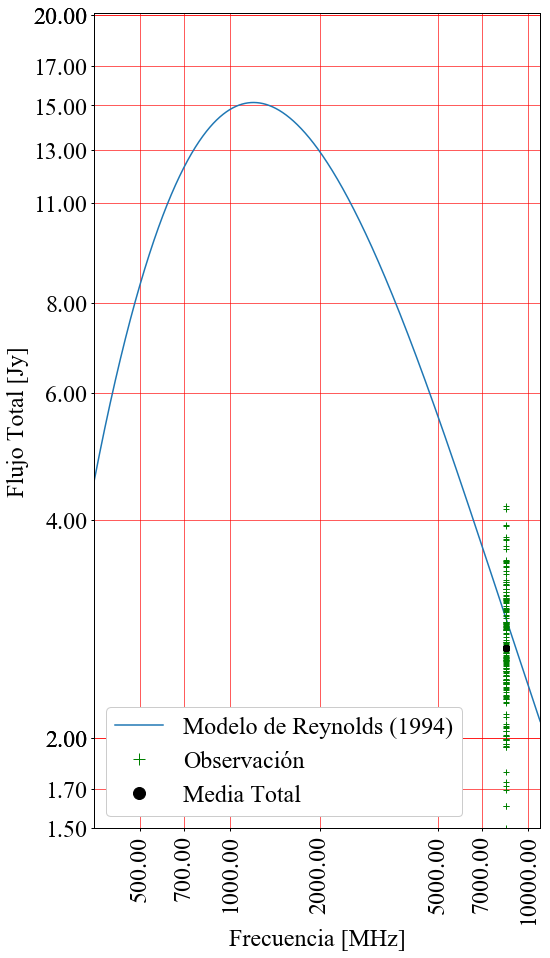

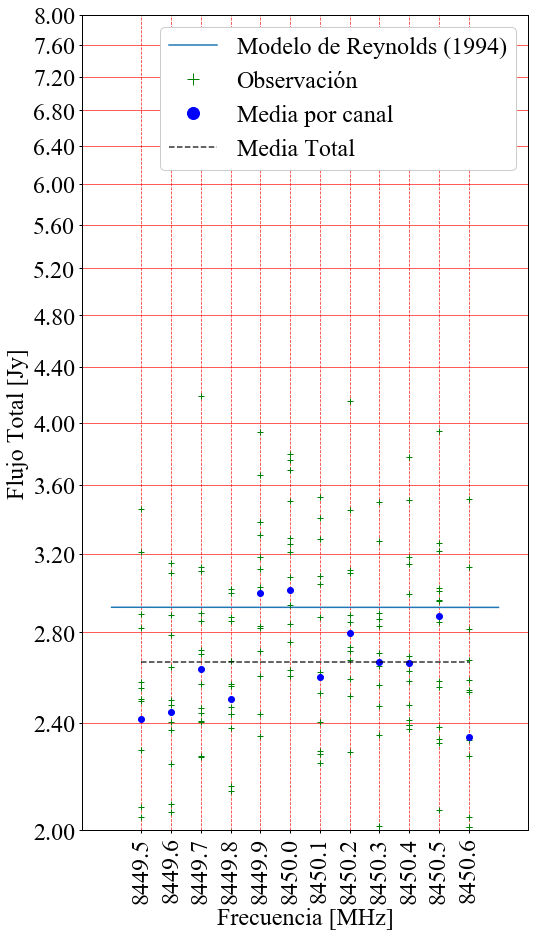

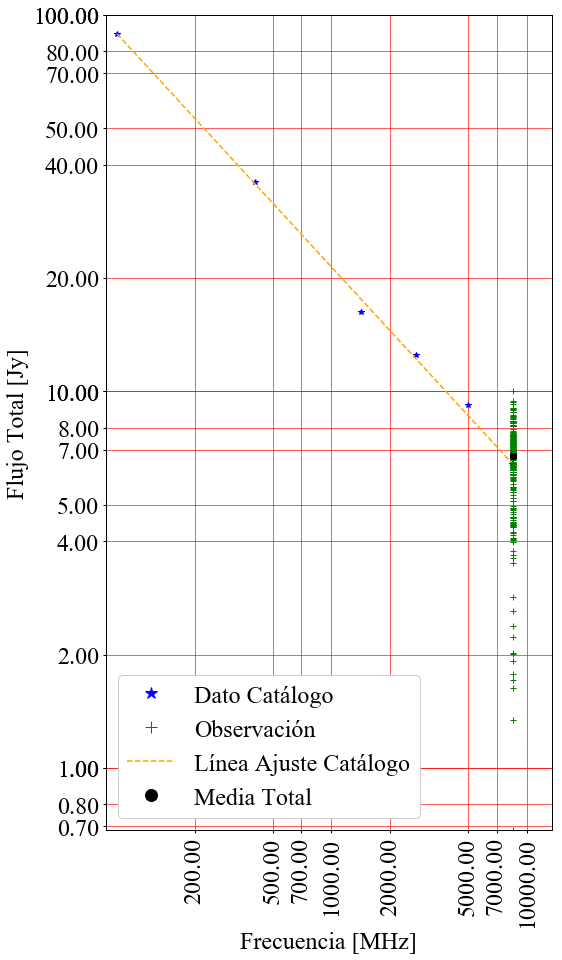

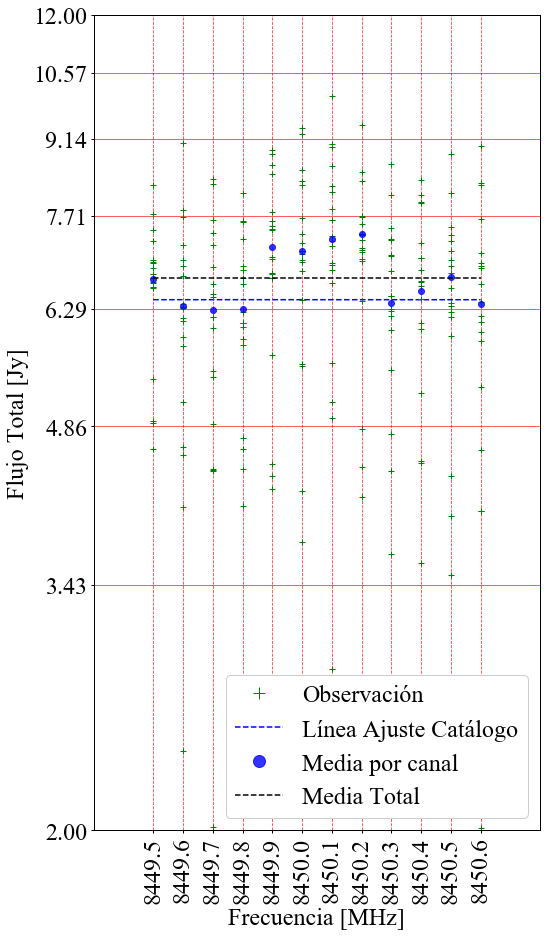

In [18]:
%matplotlib inline
### Model for 1934-638
### Flux density model for 1934-638 from Reynolds 1994
### S=10^(-30.7667 + 26.4908*(np.log10(f)) + 7.0977*(np.log10(f))^2 + 0.605334*(np.log10(f))^3)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, LogLocator, FormatStrFormatter
from scipy.optimize import curve_fit
from matplotlib.pylab import rcParams
from matplotlib.artist import setp

# function init global settings
def init_plotting():
    #rcParams['figure.figsize'] = 15,8
    rcParams['figure.figsize'] = 8,15
    rcParams['font.size'] = 24
    rcParams['font.family'] = 'Times New Roman'
    rcParams['axes.labelsize'] = plt.rcParams['font.size']
    rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    rcParams['legend.fontsize'] = plt.rcParams['font.size']
    rcParams['legend.markerscale'] = 2
    rcParams['legend.frameon'] = True
    rcParams['legend.framealpha'] = 1
    rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    rcParams['xtick.major.size'] = 3
    rcParams['xtick.minor.size'] = 3
    rcParams['xtick.major.width'] = 1
    rcParams['xtick.minor.width'] = 1
    rcParams['ytick.major.size'] = 3
    rcParams['ytick.minor.size'] = 3
    rcParams['ytick.major.width'] = 1
    rcParams['ytick.minor.width'] = 1
    rcParams['legend.frameon'] = False
    rcParams['legend.loc'] = 'center left'
    rcParams['axes.linewidth'] = 1
    rcParams['grid.alpha'] = 0.8

init_plotting()

# This looks like a line on a lof-log plot.
def func1(x, a, b):
    return a * np.power(x, b)

def rms(array):
    return np.sqrt(np.mean(np.power(array, 2)))

def func(x, a, b):
    return 10^(a*x+b)

def mean_reject_outliers(data, m=1):
    a=data[abs(data - np.mean(data)) < m * np.std(data)]
    return a.mean()

f = np.linspace(350, 11000, num=1000000)
S=10**(-30.7667 + 26.4908*(np.log10(f)) - 7.0977*(np.log10(f))**2 + 0.605334*(np.log10(f))**3)

fig, ax = plt.subplots()
ax.loglog(f,S,label=u'Modelo de Reynolds (1994)')
plt.grid(b=True, which='major', color='r', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')

#plt.title('Flux Density Model for 1934-638')
# plt.xlabel('Frequency [MHz[]')
# plt.ylabel('Total Flux [Jy]')

#plt.title('Densidad de Flujo Modelos para PKS 1934-638')
plt.xlabel(u'Frecuencia [MHz]')
plt.ylabel(u'Flujo Total [Jy]')

Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])
#Flux=np.array([2.9448518124,3.0299543428,3.448403472,3.140072743,3.6163437874,3.8018946427,3.244250952,3.399527314,3.2276098459,3.3449465625,3.5454434554,3.0538669525])

ch0=np.array([4.452786218,3.570747206,2.233339923,4.790800979,4.006548195,3.531631226,2.884822078,2.836170624,3.469558859,2.691510473,3.456131936,3.179831476,2.377426015,3.910900777])
ch1=np.array([4.298161188, 3.462641279, 3.291292254, 3.429968846, 3.867916222, 4.37127282, 2.35006091, 3.998132205, 2.862428847, 3.336637249,2.900675469,2.079923182,3.659732678,3.105037183])
ch2=np.array([3.336836091,3.144708389,5.804030195,3.337541819,3.413418275,3.960755686,3.387452828,4.308320628,3.140656258,3.765729453,3.739631376,3.558361905,4.337514979,4.012860662])
ch3=np.array([3.417373066,2.967172122,3.959856458,3.380085122,3.558143183,3.547534365,3.698696551,4.150562683,4.179881732,3.985448566,2.990587273,3.299543915,3.379098258,2.767760446])
ch4=np.array([4.581546209,3.759447473,3.924179218,3.377732376,4.68141141,5.454842459,2.753914602,5.069779519,4.321171538,3.914129114,4.190958125,4.411175902,3.255921935,3.604900185])
ch5=np.array([4.26377668,4.514933924,3.819954002,3.641343283,5.116656354,5.256914039,4.856697712,2.718069559,3.936671577,3.60673861,4.453741367,5.203928855,4.065512488,4.55625422])
ch6=np.array([4.215855344,3.502212586,3.331499751,3.983404952,3.110854381,4.89180831,2.700155337,3.173062963,3.632070068,4.553439259,4.276770411,4.713262371,2.724294943,3.159133368])
ch7=np.array([4.779578201,3.954118101,3.877259515,4.000667985,3.784333583,5.758962839,3.589693534,4.316465615,3.707855384,3.168854351,3.485073732,3.763942074,2.698457617,4.2927631])
ch8=np.array([3.428624813,2.796058172,3.924091608,3.75050303,2.233284869,4.843057617,3.260077179,2.76862051,3.968828457,3.692337092,3.66875782,4.535481747,3.553522899,4.01065849])
ch9=np.array([3.43329422,4.358814514,3.297151523,4.866583164,3.728490306,5.231390054,2.412795645,4.147479505,3.319588577,4.411177449,3.315615245,3.342629528,3.575273508,3.638598883])
ch10=np.array([4.099510245,2.868657577,3.540400447,3.305204713,4.5170039,5.469308066,4.094474083,3.237695935,4.187100776,3.575251589,3.952098049,3.214990096,4.4591612,4.169243279])
ch11=np.array([3.506141738,3.519511167,3.583778885,2.490752494,2.788566534,4.337959662,3.234026363,2.791327488,4.871938747,2.758340764,3.70419007,3.148190835,3.907961786,2.8348712])


ch0=ch0/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch1=ch1/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch2=ch2/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch3=ch3/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch4=ch4/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch5=ch5/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch6=ch6/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch7=ch7/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch8=ch8/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch9=ch9/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch10=ch10/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch11=ch11/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)

Flux=np.array([ch0[0],ch1[0],ch2[0],ch3[0],ch4[0],ch5[0],ch6[0],ch7[0],ch8[0],ch9[0],ch10[0],ch11[0]])
ax.loglog(Freq,Flux, '+', c='green', alpha=1, label=u'Observación')    

for i in range(len(ch0)-1):
    Flux=np.array([ch0[i+1],ch1[i+1],ch2[i+1],ch3[i+1],ch4[i+1],ch5[i+1],ch6[i+1],ch7[i+1],ch8[i+1],ch9[i+1],ch10[i+1],ch11[i+1]])
    ax.loglog(Freq,Flux, '+', c='green', alpha=1)    
    
MeanFlux=np.array([mean_reject_outliers(ch0),mean_reject_outliers(ch1),
                   mean_reject_outliers(ch2),mean_reject_outliers(ch3),
                   mean_reject_outliers(ch4),mean_reject_outliers(ch5),
                   mean_reject_outliers(ch6),mean_reject_outliers(ch7),
                   mean_reject_outliers(ch8),mean_reject_outliers(ch9),
                   mean_reject_outliers(ch10),mean_reject_outliers(ch11)])
#MeanFlux=np.array([ch0.mean(),ch1.mean(),ch2.mean(),ch3.mean(),ch4.mean(),ch5.mean(),ch6.mean(),ch7.mean(),ch8.mean(),ch9.mean(),ch10.mean(),ch11.mean()])
TotalMean=MeanFlux.mean()
Line=np.array([TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean])
Mod=10**(-30.7667 + 26.4908*(np.log10(Freq)) - 7.0977*(np.log10(Freq))**2 + 0.605334*(np.log10(Freq))**3)

ax.loglog(Freq,Line, 'o', c='black', alpha=1, label=u'Media Total')  

aux=np.max(S)+5
ax.set_ylim(ymax=aux,ymin=0)
ax.set_xlim(xmax=np.max(f)+1,xmin=np.min(f)-1)

for label in ax.get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")
    
xmajorLocator = LogLocator(subs=np.linspace(0,10,5,endpoint=True,dtype=np.int))
ymajorLocator = LogLocator(subs=np.linspace(0,aux,10,endpoint=True,dtype=np.int))
majorFormatter = FormatStrFormatter('%1.2f')
minorFormatter = FormatStrFormatter('%1.1f')
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.yaxis.set_major_formatter(majorFormatter)
ax.minorticks_off()

lgd = ax.legend(loc='lower left',fancybox = True, shadow = False) #bbox_to_anchor=(1.05, 0.5)
lgd.draw_frame(True)
plt.savefig('1934-638_a.pdf', format='pdf', dpi=1200, bbox_extra_artists=(lgd,), bbox_inches='tight')


f1 = np.linspace(8449.4,8450.7, num=1000)
S1=10**(-30.7667 + 26.4908*(np.log10(f1)) - 7.0977*(np.log10(f1))**2 + 0.605334*(np.log10(f1))**3)

fig1, bx = plt.subplots()
bx.loglog(f1,S1,label=u'Modelo de Reynolds (1994)')
plt.grid(b=True, which='major', color='r', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')

# plt.title('Flux Density Model for 1934-638')
# plt.xlabel('Frequency (MHz.)')
# plt.ylabel('Flux (Jy.)')

#plt.title('Densidad de Flujo Modelos para PKS 1934-638')
plt.xlabel(u'Frecuencia [MHz]')
plt.ylabel(u'Flujo Total [Jy]')
plt.hold(True)

# Freq=np.array([8449.5,8449.6,8449.7,8449.8,8449.9,8450.0,8450.1,8450.2,8450.3,8450.4,8450.5,8450.6])
# #Flux=np.array([2.9448518124,3.0299543428,3.448403472,3.140072743,3.6163437874,3.8018946427,3.244250952,3.399527314,3.2276098459,3.3449465625,3.5454434554,3.0538669525])

# ch0=np.array([4.452786218,3.570747206,2.233339923,4.790800979,4.006548195,3.531631226,2.884822078,2.836170624,3.469558859,2.691510473,3.456131936,3.179831476,2.377426015,3.910900777])
# ch1=np.array([4.298161188, 3.462641279, 3.291292254, 3.429968846, 3.867916222, 4.37127282, 2.35006091, 3.998132205, 2.862428847, 3.336637249,2.900675469,2.079923182,3.659732678,3.105037183])
# ch2=np.array([3.336836091,3.144708389,5.804030195,3.337541819,3.413418275,3.960755686,3.387452828,4.308320628,3.140656258,3.765729453,3.739631376,3.558361905,4.337514979,4.012860662])
# ch3=np.array([3.417373066,2.967172122,3.959856458,3.380085122,3.558143183,3.547534365,3.698696551,4.150562683,4.179881732,3.985448566,2.990587273,3.299543915,3.379098258,2.767760446])
# ch4=np.array([4.581546209,3.759447473,3.924179218,3.377732376,4.68141141,5.454842459,2.753914602,5.069779519,4.321171538,3.914129114,4.190958125,4.411175902,3.255921935,3.604900185])
# ch5=np.array([4.26377668,4.514933924,3.819954002,3.641343283,5.116656354,5.256914039,4.856697712,2.718069559,3.936671577,3.60673861,4.453741367,5.203928855,4.065512488,4.55625422])
# ch6=np.array([4.215855344,3.502212586,3.331499751,3.983404952,3.110854381,4.89180831,2.700155337,3.173062963,3.632070068,4.553439259,4.276770411,4.713262371,2.724294943,3.159133368])
# ch7=np.array([4.779578201,3.954118101,3.877259515,4.000667985,3.784333583,5.758962839,3.589693534,4.316465615,3.707855384,3.168854351,3.485073732,3.763942074,2.698457617,4.2927631])
# ch8=np.array([3.428624813,2.796058172,3.924091608,3.75050303,2.233284869,4.843057617,3.260077179,2.76862051,3.968828457,3.692337092,3.66875782,4.535481747,3.553522899,4.01065849])
# ch9=np.array([3.43329422,4.358814514,3.297151523,4.866583164,3.728490306,5.231390054,2.412795645,4.147479505,3.319588577,4.411177449,3.315615245,3.342629528,3.575273508,3.638598883])
# ch10=np.array([4.099510245,2.868657577,3.540400447,3.305204713,4.5170039,5.469308066,4.094474083,3.237695935,4.187100776,3.575251589,3.952098049,3.214990096,4.4591612,4.169243279])
# ch11=np.array([3.506141738,3.519511167,3.583778885,2.490752494,2.788566534,4.337959662,3.234026363,2.791327488,4.871938747,2.758340764,3.70419007,3.148190835,3.907961786,2.8348712])

Flux=np.array([ch0[0],ch1[0],ch2[0],ch3[0],ch4[0],ch5[0],ch6[0],ch7[0],ch8[0],ch9[0],ch10[0],ch11[0]])
bx.loglog(Freq,Flux, '+', c='green', alpha=1, label=u'Observación')    

for i in range(len(ch0)-1):
    Flux=np.array([ch0[i+1],ch1[i+1],ch2[i+1],ch3[i+1],ch4[i+1],ch5[i+1],ch6[i+1],ch7[i+1],ch8[i+1],ch9[i+1],ch10[i+1],ch11[i+1]])
    bx.loglog(Freq,Flux, '+', c='green', alpha=1)    

MeanFlux=np.array([mean_reject_outliers(ch0),mean_reject_outliers(ch1),
                   mean_reject_outliers(ch2),mean_reject_outliers(ch3),
                   mean_reject_outliers(ch4),mean_reject_outliers(ch5),
                   mean_reject_outliers(ch6),mean_reject_outliers(ch7),
                   mean_reject_outliers(ch8),mean_reject_outliers(ch9),
                   mean_reject_outliers(ch10),mean_reject_outliers(ch11)])
#MeanFlux=np.array([ch0.mean(),ch1.mean(),ch2.mean(),ch3.mean(),ch4.mean(),ch5.mean(),ch6.mean(),ch7.mean(),ch8.mean(),ch9.mean(),ch10.mean(),ch11.mean()])
TotalMean=MeanFlux.mean()
Line=np.array([TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean])

Mod=10**(-30.7667 + 26.4908*(np.log10(Freq)) - 7.0977*(np.log10(Freq))**2 + 0.605334*(np.log10(Freq))**3)

Diff=MeanFlux - Mod

Y=Mod.mean()
YDiff=Diff.mean()

print 'Diff 1934-638',YDiff

# # # fit with np.polyfit
# fit = np.polyfit(Freq, MeanFlux, 1)
# ynew = np.polyval(fit,Freq)

# bx.loglog(Freq, ynew,'-', c='darkorange', label='Fit Line')

bx.loglog(Freq,MeanFlux, 'o', c='blue', alpha=1, label=u'Media por canal')    

bx.loglog(Freq,Line, '--', c='black', alpha=0.8, label='Media Total')    

#bx.loglog(Freq,Mod, '+', c='black', alpha=0.8, label='Data')    

# bx.loglog(Freq,MeanFlux-Diff, '+', c='green', alpha=1, label='Mean by channel') 

bx.set_ylim(ymax=8.0,ymin=2.0)
bx.set_xlim(xmax=np.max(Freq)+0.2,xmin=np.min(Freq)-0.2)

xminorLocator = LogLocator(subs=np.linspace(np.min(Freq),np.max(Freq),12,endpoint=True,dtype=np.float))
ymajorLocator = LogLocator(subs=np.linspace(2,8,16,endpoint=True,dtype=np.float))
majorFormatter = FormatStrFormatter('%1.2f')
minorFormatter = FormatStrFormatter('%1.1f')
bx.xaxis.set_major_locator(xmajorLocator)
bx.xaxis.set_minor_locator(xminorLocator)
bx.yaxis.set_major_locator(ymajorLocator)
bx.xaxis.set_major_formatter(majorFormatter)
bx.xaxis.set_minor_formatter(minorFormatter)
bx.yaxis.set_major_formatter(majorFormatter)
bx.minorticks_off()
bx.set_xticks(Freq, minor=True)

for label in bx.get_xminorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")


lgd = bx.legend(loc='upper right',fancybox = True, shadow = False) #bbox_to_anchor=(1.05, 0.5)
lgd.draw_frame(True)
plt.savefig('1934-638_b.pdf', format='pdf', dpi=1200, bbox_extra_artists=(lgd,), bbox_inches='tight')

## F0521
import xlrd
book = xlrd.open_workbook('/home/bgx/potencias.xls')
sh = book.sheet_by_index(0)
a=[r.value for r in sh.col(0)]
ch0=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(1)]
ch1=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(2)]
ch2=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(3)]
ch3=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(4)]
ch4=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(5)]
ch5=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(6)]
ch6=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(7)]
ch7=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(8)]
ch8=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(9)]
ch9=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(10)]
ch10=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(11)]
ch11=np.array(a[1:7]+a[8:])

ch0=ch0/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch1=ch1/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch2=ch2/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch3=ch3/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch4=ch4/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch5=ch5/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch6=ch6/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch7=ch7/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch8=ch8/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch9=ch9/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch10=ch10/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch11=ch11/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)

#### J0522-362 o B0521-365
Freq2=np.array([80,408,1410,2700,5000,8400])
Flux2=np.array([89,36.1,16.3,12.5,9.23,6.43])
Freq3=np.append(Freq2,Freq)

# print Freq3
# # fit with np.polyfit
# fit = np.polyfit(Freq2, Flux2, 1)
# ynew1 = np.polyval(fit,Freq2)

fitParams, fitCovariance = curve_fit(func1, Freq2, Flux2)
ynew1 = func1(Freq3,*fitParams)

fig2, cx = plt.subplots()

cx.loglog(Freq2,Flux2, '*', c='blue', alpha=1, label=u'Dato Catálogo')    

Flux=np.array([ch0[0],ch1[0],ch2[0],ch3[0],ch4[0],ch5[0],ch6[0],ch7[0],ch8[0],ch9[0],ch10[0],ch11[0]])

cx.loglog(Freq,Flux, '+', c='green', alpha=1, label=u'Observación')    

cx.loglog(Freq3, ynew1,'--', c='orange', label=u'Línea Ajuste Catálogo')

plt.grid(b=True, which='major', color='r', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')

#plt.title('Flux Density for 0521-365')
#plt.xlabel('Frequency (MHz.)')
#plt.ylabel('Flux (Jy.)')
#plt.hold(True)

#plt.title('Densidad de Flujo Modelos para PKS 1934-638')
plt.xlabel(u'Frecuencia [MHz]')
plt.ylabel(u'Flujo Total [Jy]')
plt.hold(True)

for i in range(len(ch0)-1):
    Flux=np.array([ch0[i+1],ch1[i+1],ch2[i+1],ch3[i+1],ch4[i+1],ch5[i+1],ch6[i+1],ch7[i+1],ch8[i+1],ch9[i+1],ch10[i+1],ch11[i+1]])
    cx.loglog(Freq,Flux, '+', c='green', alpha=1)    

MeanFlux=np.array([mean_reject_outliers(ch0),mean_reject_outliers(ch1),
                   mean_reject_outliers(ch2),mean_reject_outliers(ch3),
                   mean_reject_outliers(ch4),mean_reject_outliers(ch5),
                   mean_reject_outliers(ch6),mean_reject_outliers(ch7),
                   mean_reject_outliers(ch8),mean_reject_outliers(ch9),
                   mean_reject_outliers(ch10),mean_reject_outliers(ch11)])
#MeanFlux=np.array([ch0.mean(),ch1.mean(),ch2.mean(),ch3.mean(),ch4.mean(),ch5.mean(),ch6.mean(),ch7.mean(),ch8.mean(),ch9.mean(),ch10.mean(),ch11.mean()])
TotalMean=MeanFlux.mean()
Line=np.array([TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean])

# # fit with np.polyfit
fit = np.polyfit(Freq, MeanFlux, 1)
ynew = np.polyval(fit,Freq)

# cx.loglog(Freq, ynew,'-', c='darkorange', label='Fit Line')

# cx.loglog(Freq,MeanFlux, 'o', c='black', alpha=0.8, label=u'Media por canal')    

cx.loglog(Freq,Line, 'o', c='black', alpha=1, label=u'Media Total')  

# print('Mean by channel', MeanFlux)
# print('Total Mean %f'%MeanFlux.mean())

cx.set_ylim(ymax=100.0,ymin=0.0)
cx.set_xlim(xmax=np.max(Freq3)+5000.0,xmin=np.min(Freq3)-10.0)

for label in cx.get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")
    
xmajorLocator = LogLocator(subs=np.linspace(0,10,5,endpoint=True,dtype=np.int))
ymajorLocator = LogLocator(subs=np.linspace(0,10,8,endpoint=True,dtype=np.int))
majorFormatter = FormatStrFormatter('%1.2f')
minorFormatter = FormatStrFormatter('%1.1f')
cx.xaxis.set_major_locator(xmajorLocator)
cx.yaxis.set_major_locator(ymajorLocator)
cx.xaxis.set_major_formatter(majorFormatter)
cx.yaxis.set_major_formatter(majorFormatter)
cx.minorticks_off()

lgd = cx.legend(loc='lower left',fancybox = True, shadow = False) #bbox_to_anchor=(1.05, 0.5)
lgd.draw_frame(True)
plt.savefig('521-365_a.pdf', format='pdf', dpi=1200, bbox_extra_artists=(lgd,), bbox_inches='tight')

## F0521
import xlrd
book = xlrd.open_workbook('/home/bgx/potencias.xls')
sh = book.sheet_by_index(0)
a=[r.value for r in sh.col(0)]
ch0=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(1)]
ch1=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(2)]
ch2=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(3)]
ch3=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(4)]
ch4=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(5)]
ch5=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(6)]
ch6=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(7)]
ch7=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(8)]
ch8=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(9)]
ch9=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(10)]
ch10=np.array(a[1:7]+a[8:])
a=[r.value for r in sh.col(11)]
ch11=np.array(a[1:7]+a[8:])

ch0=ch0/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch1=ch1/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch2=ch2/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch3=ch3/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch4=ch4/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch5=ch5/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch6=ch6/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch7=ch7/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch8=ch8/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch9=ch9/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch10=ch10/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)
ch11=ch11/(1+0.580404525325+np.log10(0.580404525325)+np.log10(0.580404525325)**2+np.log10(0.580404525325)**3)


#### J0522-362 o B0521-365
Freq2=np.array([80,408,1410,2700,5000,8400])
Flux2=np.array([89,36.1,16.3,12.5,9.23,6.43])
Freq3=np.append(Freq2,Freq)

fitParams, fitCovariance = curve_fit(func1, Freq2, Flux2)
ynew1 = func1(Freq,*fitParams)

fig3, dx = plt.subplots()

#dx.loglog(Freq2,Flux2, '*', c='blue', alpha=1, label='Catalogue')    

Flux=np.array([ch0[0],ch1[0],ch2[0],ch3[0],ch4[0],ch5[0],ch6[0],ch7[0],ch8[0],ch9[0],ch10[0],ch11[0]])

dx.loglog(Freq,Flux, '+', c='green', alpha=1, label=u'Observación')    

dx.loglog(Freq, ynew1,'--', c='blue', label=u'Línea Ajuste Catálogo')

plt.grid(b=True, which='major', color='r', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='--')

# plt.title('Flux Density for 0521-365')
# plt.xlabel('Frequency (MHz.)')
# plt.ylabel('Flux (Jy.)')
# plt.hold(True)

plt.xlabel(u'Frecuencia [MHz]')
plt.ylabel(u'Flujo Total [Jy]')
plt.hold(True)

for i in range(len(ch0)-1):
    Flux=np.array([ch0[i+1],ch1[i+1],ch2[i+1],ch3[i+1],ch4[i+1],ch5[i+1],ch6[i+1],ch7[i+1],ch8[i+1],ch9[i+1],ch10[i+1],ch11[i+1]])
    dx.loglog(Freq,Flux, '+', c='green', alpha=1)    

MeanFlux=np.array([mean_reject_outliers(ch0),mean_reject_outliers(ch1),
                   mean_reject_outliers(ch2),mean_reject_outliers(ch3),
                   mean_reject_outliers(ch4),mean_reject_outliers(ch5),
                   mean_reject_outliers(ch6),mean_reject_outliers(ch7),
                   mean_reject_outliers(ch8),mean_reject_outliers(ch9),
                   mean_reject_outliers(ch10),mean_reject_outliers(ch11)])
#MeanFlux=np.array([ch0.mean(),ch1.mean(),ch2.mean(),ch3.mean(),ch4.mean(),ch5.mean(),ch6.mean(),ch7.mean(),ch8.mean(),ch9.mean(),ch10.mean(),ch11.mean()])
TotalMean=MeanFlux.mean()
Line=np.array([TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean,TotalMean])

# # fit with np.polyfit
fit = np.polyfit(Freq, MeanFlux, 1)
ynew = np.polyval(fit,Freq)

Diff=MeanFlux - ynew1
Y1Diff=Diff.mean()
Y1=ynew1.mean()

print 'Diff 521-365',Y1Diff

# dx.loglog(Freq, ynew,'-', c='darkorange', label=u'Línea Ajuste')

dx.loglog(Freq,MeanFlux, 'o', c='blue', alpha=0.8, label=u'Media por canal')    

dx.loglog(Freq,Line, '--', c='black', alpha=1, label=u'Media Total')    

# print('Mean by channel', MeanFlux)
# print('Total Mean %f'%MeanFlux.mean())

dx.set_ylim(ymax=12.0,ymin=2.0)
dx.set_xlim(xmax=np.max(Freq)+0.2,xmin=np.min(Freq)-0.2)

xminorLocator = LogLocator(subs=np.linspace(np.min(Freq),np.max(Freq),12,endpoint=True,dtype=np.float))
ymajorLocator = LogLocator(subs=np.linspace(2.0,12.0,8,endpoint=True,dtype=np.float))
majorFormatter = FormatStrFormatter('%1.2f')
minorFormatter = FormatStrFormatter('%1.1f')
dx.xaxis.set_major_locator(xmajorLocator)
dx.xaxis.set_minor_locator(xminorLocator)
dx.yaxis.set_major_locator(ymajorLocator)
dx.xaxis.set_major_formatter(majorFormatter)
dx.xaxis.set_minor_formatter(minorFormatter)
dx.yaxis.set_major_formatter(majorFormatter)
dx.minorticks_off()
dx.set_xticks(Freq, minor=True)

for label in dx.get_xminorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment("center")

lgd = dx.legend(loc='lower right',fancybox = True, shadow = False) #bbox_to_anchor=(1.05, 0.5)
lgd.draw_frame(True)
plt.savefig('521-365_b.pdf', format='pdf', dpi=1200, bbox_extra_artists=(lgd,), bbox_inches='tight')


cte=(YDiff/Y)*(Y1/Y1Diff)/2
print cte


